<a href="https://colab.research.google.com/github/py242016019/CEE2/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta de Dados

Os dados utilizados neste trabalho referem-se à Taxa SELIC diária disponibilizada pelo Banco Central do Brasil (BCB). A coleta foi realizada por meio da API do BCB, especificamente na série temporal da taxa de juros SELIC, disponível no link:

🔗 https://dadosabertos.bcb.gov.br/dataset/11-taxa-de-juros---selic

O período de análise foi parametrizado no código, permitindo que o usuário selecione o intervalo de datas conforme a necessidade. Para os exemplos presentes neste relatório, foi utilizado o período entre 02/03/2015 e 22/03/2015, mas o código desenvolvido permite alterar facilmente esse intervalo.

Os dados extraídos consistem nas taxas SELIC diárias expressas em percentual (%), que são posteriormente utilizadas nos cálculos de conversão para taxa anual, taxa acumulada e simulações de investimentos.

## Acessar a API do Banco Central e baixar a série temporal diária da Taxa SELIC dentro de um intervalo especificado.

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

In [3]:
inicio= input("Digite a data inicial (DD-MM-AAAA): ")
fim= input("Digite a data final (DD-MM-AAAA): ")

url=f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial={inicio}&dataFinal={fim}"

try:
    response = requests.get(url)
    response.raise_for_status()

    df_selic = pd.read_csv(StringIO(response.text), sep=';')
    df_selic['data'] = pd.to_datetime(df_selic['data'], format='%d/%m/%Y')

    print(df_selic)

except requests.RequestException as e:
  print(e)

Digite a data inicial (DD-MM-AAAA): 02/03/2015
Digite a data final (DD-MM-AAAA): 22/03/2015
         data     valor
0  2015-03-02  0,045513
1  2015-03-03  0,045513
2  2015-03-04  0,045513
3  2015-03-05  0,047279
4  2015-03-06  0,047279
5  2015-03-09  0,047279
6  2015-03-10  0,047279
7  2015-03-11  0,047279
8  2015-03-12  0,047279
9  2015-03-13  0,047279
10 2015-03-16  0,047279
11 2015-03-17  0,047279
12 2015-03-18  0,047279
13 2015-03-19  0,047279
14 2015-03-20  0,047279


# Metodologia

## 1. Conversão da Taxa Diária para Anual
Para converter a taxa SELIC diária em taxa anual, foi utilizada a seguinte fórmula:

$$T_{anual} = (1+T_{diaria})^{252}-1$$
Onde:

- $T_{diaria}$ é a taxa diária expressa em valor decimal.
- O número 252 representa a quantidade aproximada de dias úteis em um ano.

## 2. Cálculo da taxa acumulada
A Taxa Selic Acumulada foi calculada aplicando a seguinte fórmula:
$$T_{acumulada}= \prod_{}^{}(1 + T_{diaria})-1$$
em que o produtório é calculado ao longo de todos os dias do período analisado.

## 3. Simulação de investimento único

O investimento único consiste na aplicação de um valor inicial no primeiro dia do período, que rende diariamente conforme a taxa SELIC. A fórmula utilizada é:

$$V=V_{inicial}\prod_{}^{}(1+T_{diária})$$
Onde:
- $V$ é o valor acumulado no final do período.
- $V_{inicial}$ é o valor aplicado no início.

## 4. Simulação de investimento recorrente

O investimento recorrente considera a realização de aportes constantes a cada dia útil. Cada aporte passa a render desde a sua data de aplicação até o final do período, aplicando juros compostos. A fórmula utilizada é:

$$ V= \sum_{i=1}^{n}Aporte \prod_{j=i}^{n}(1+ T_{diária})$$
Onde:
- $V$ é o valor acumulado no final do período.
- $Aporte$ é o valor aplicado diariamente.
- O produtório $\prod_{j=i}^{n}$ representa o rendimento do aporte feito no dia $i$ até o final do período no dia $n$.

# Resultados

## Conversão da taxa diária para anual

In [4]:
df_selic = df_selic.rename(columns={'valor': 'SELIC diária'})

df_selic['SELIC diária'] = df_selic['SELIC diária'].str.replace(',', '.')
df_selic['SELIC diária'] = pd.to_numeric(df_selic['SELIC diária'], errors='coerce')

In [5]:
df_selic["SELIC anual"] = ((1 + (df_selic["SELIC diária"])/100)**(252) -1)*100

print(df_selic)

         data  SELIC diária  SELIC anual
0  2015-03-02      0.045513    12.149954
1  2015-03-03      0.045513    12.149954
2  2015-03-04      0.045513    12.149954
3  2015-03-05      0.047279    12.649937
4  2015-03-06      0.047279    12.649937
5  2015-03-09      0.047279    12.649937
6  2015-03-10      0.047279    12.649937
7  2015-03-11      0.047279    12.649937
8  2015-03-12      0.047279    12.649937
9  2015-03-13      0.047279    12.649937
10 2015-03-16      0.047279    12.649937
11 2015-03-17      0.047279    12.649937
12 2015-03-18      0.047279    12.649937
13 2015-03-19      0.047279    12.649937
14 2015-03-20      0.047279    12.649937


## Cálculo da taxa acumulada


In [6]:
df_selic['SELIC acumulada'] = (( (1 + df_selic['SELIC diária'] / 100).cumprod() ) - 1)*100

print(df_selic)

         data  SELIC diária  SELIC anual  SELIC acumulada
0  2015-03-02      0.045513    12.149954         0.045513
1  2015-03-03      0.045513    12.149954         0.091047
2  2015-03-04      0.045513    12.149954         0.136601
3  2015-03-05      0.047279    12.649937         0.183945
4  2015-03-06      0.047279    12.649937         0.231311
5  2015-03-09      0.047279    12.649937         0.278699
6  2015-03-10      0.047279    12.649937         0.326110
7  2015-03-11      0.047279    12.649937         0.373543
8  2015-03-12      0.047279    12.649937         0.420999
9  2015-03-13      0.047279    12.649937         0.468477
10 2015-03-16      0.047279    12.649937         0.515977
11 2015-03-17      0.047279    12.649937         0.563500
12 2015-03-18      0.047279    12.649937         0.611046
13 2015-03-19      0.047279    12.649937         0.658613
14 2015-03-20      0.047279    12.649937         0.706204


## Planilha com os resultados

In [7]:
df_selic['data'] = pd.to_datetime(df_selic['data']).dt.strftime('%d/%m/%Y')
print(df_selic.to_markdown(index=False))

| data       |   SELIC diária |   SELIC anual |   SELIC acumulada |
|:-----------|---------------:|--------------:|------------------:|
| 02/03/2015 |       0.045513 |       12.15   |         0.045513  |
| 03/03/2015 |       0.045513 |       12.15   |         0.0910467 |
| 04/03/2015 |       0.045513 |       12.15   |         0.136601  |
| 05/03/2015 |       0.047279 |       12.6499 |         0.183945  |
| 06/03/2015 |       0.047279 |       12.6499 |         0.231311  |
| 09/03/2015 |       0.047279 |       12.6499 |         0.278699  |
| 10/03/2015 |       0.047279 |       12.6499 |         0.32611   |
| 11/03/2015 |       0.047279 |       12.6499 |         0.373543  |
| 12/03/2015 |       0.047279 |       12.6499 |         0.420999  |
| 13/03/2015 |       0.047279 |       12.6499 |         0.468477  |
| 16/03/2015 |       0.047279 |       12.6499 |         0.515977  |
| 17/03/2015 |       0.047279 |       12.6499 |         0.5635    |
| 18/03/2015 |       0.047279 |       12.6499 | 

## Gráficos


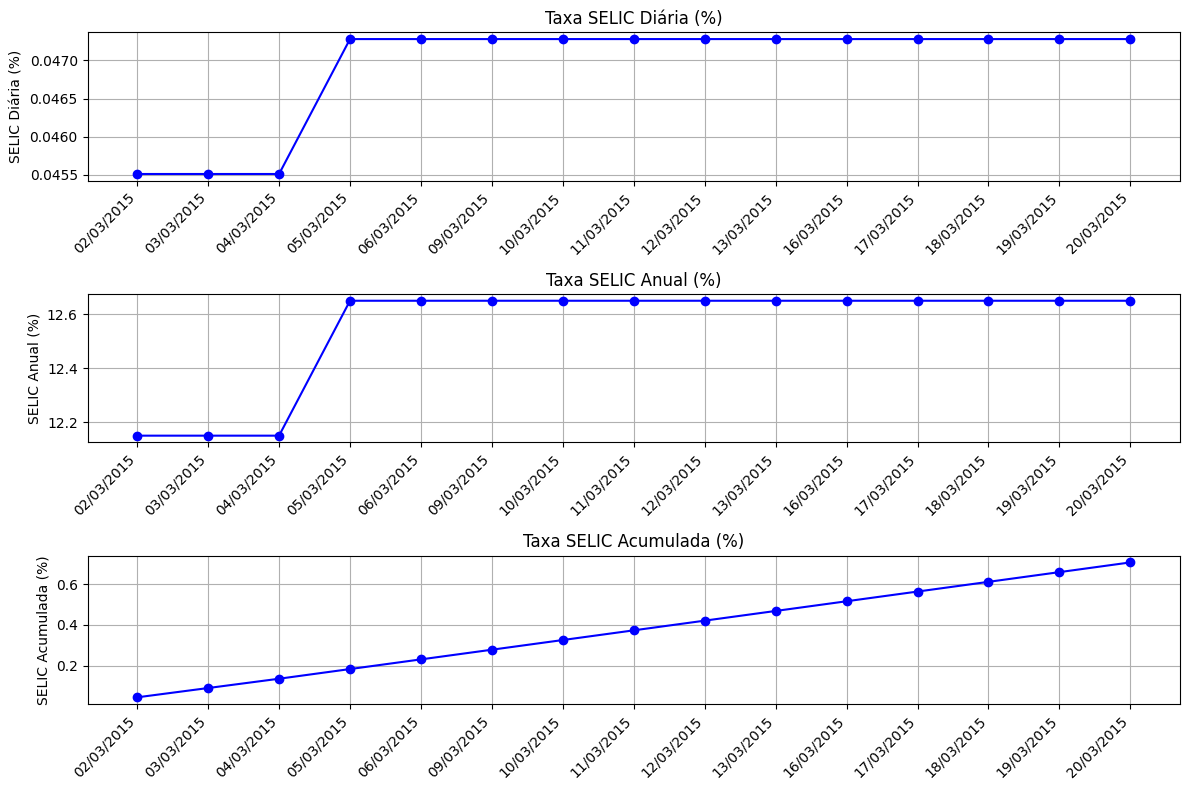

In [8]:
plt.figure(figsize=(12, 8))

# Gráfico SELIC Diária
plt.subplot(3, 1, 1)
plt.plot(df_selic['data'], df_selic['SELIC diária'], marker='o', color='blue')
plt.title('Taxa SELIC Diária (%)')
plt.ylabel('SELIC Diária (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Gráfico SELIC anual
plt.subplot(3, 1, 2)
plt.plot(df_selic['data'], df_selic['SELIC anual'], marker='o', color='blue')
plt.title('Taxa SELIC Anual (%)')
plt.ylabel('SELIC Anual (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

#Gráfico SELIC acumulada
plt.subplot(3, 1, 3)
plt.plot(df_selic['data'], df_selic['SELIC acumulada'], marker='o', color='blue')
plt.title('Taxa SELIC Acumulada (%)')
plt.ylabel('SELIC Acumulada (%)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Períodos de maior e de menor taxa anual

In [9]:
maior_taxa = df_selic.loc[df_selic['SELIC anual'].idxmax()]

menor_taxa = df_selic.loc[df_selic['SELIC anual'].idxmin()]

print(f"O período com a maior taxa de juros foi {maior_taxa['data']}, no qual a taxa foi de {maior_taxa['SELIC anual']:.2f}% a.a..")
print(f"O período com a menor taxa de juros foi {menor_taxa['data']}, no qual a taxa foi de {menor_taxa['SELIC anual']:.2f}% a.a..")


O período com a maior taxa de juros foi 05/03/2015, no qual a taxa foi de 12.65% a.a..
O período com a menor taxa de juros foi 02/03/2015, no qual a taxa foi de 12.15% a.a..


## Simulação de investimento único


In [14]:
df_simulacao= df_selic[["data", "SELIC diária"]].copy()

valor= float(input("Digite o valor a ser investido: "))

df_simulacao["fator"]= 1 + (df_simulacao["SELIC diária"]/100)

df_simulacao["Valor (R$)"]= valor * df_simulacao["fator"].cumprod()

df_simulacao= df_simulacao.drop(columns=["fator"])

print(df_simulacao)

Digite o valor a ser investido: 5000
          data  SELIC diária   Valor (R$)
0   02/03/2015      0.045513  5002.275650
1   03/03/2015      0.045513  5004.552336
2   04/03/2015      0.045513  5006.830058
3   05/03/2015      0.047279  5009.197237
4   06/03/2015      0.047279  5011.565535
5   09/03/2015      0.047279  5013.934953
6   10/03/2015      0.047279  5016.305492
7   11/03/2015      0.047279  5018.677151
8   12/03/2015      0.047279  5021.049931
9   13/03/2015      0.047279  5023.423833
10  16/03/2015      0.047279  5025.798858
11  17/03/2015      0.047279  5028.175005
12  18/03/2015      0.047279  5030.552276
13  19/03/2015      0.047279  5032.930671
14  20/03/2015      0.047279  5035.310190


## Simulação de investimento recorrente

In [22]:
aporte = float(input('Digite o valor do aporte diário: '))

df_simulacao2 = df_selic[["data", "SELIC diária"]].copy()

df_simulacao2["fator"] = 1 + (df_simulacao2["SELIC diária"] / 100)

valores = []
for i in range(len(df_simulacao2)):
    fator_acumulado = df_simulacao2["fator"].iloc[i:]
    valor_dia = aporte * fator_acumulado.cumprod().iloc[-1]
    valores.append(valor_dia)

df_simulacao2["Valor Acumulado (R$)"] = pd.Series(valores).cumsum()

df_simulacao2 = df_simulacao2.drop(columns=["fator"])

print(df_simulacao2)

Digite o valor do aporte diário: 100
          data  SELIC diária  Valor Acumulado (R$)
0   02/03/2015      0.045513            100.706204
1   03/03/2015      0.045513            201.366594
2   04/03/2015      0.045513            301.981192
3   05/03/2015      0.047279            402.550017
4   06/03/2015      0.047279            503.071317
5   09/03/2015      0.047279            603.545115
6   10/03/2015      0.047279            703.971431
7   11/03/2015      0.047279            804.350290
8   12/03/2015      0.047279            904.681712
9   13/03/2015      0.047279           1004.965722
10  16/03/2015      0.047279           1105.202341
11  17/03/2015      0.047279           1205.391591
12  18/03/2015      0.047279           1305.533495
13  19/03/2015      0.047279           1405.628075
14  20/03/2015      0.047279           1505.675354
